In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# warning非表示
import warnings
# すべての警告を表示させない設定
warnings.simplefilter('ignore')

In [15]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data , columns=wine.feature_names)
wine_df = pd.concat([pd.Series(wine.target), wine_df], axis=1)
df_new = wine_df.rename(columns={0: 'class'})

df_new.head(5)

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
df_new["class"].value_counts()
#本来はこれはわからない前提、確認のため3クラスあることを頭に入れておく

1    71
0    59
2    48
Name: class, dtype: int64

In [17]:
X = df_new[["color_intensity", "proline"]]

In [18]:
X.head()

,color_intensity,proline
0,5.64,1065.0
1,4.38,1050.0
2,5.68,1185.0
3,7.80,1480.0
4,4.32,735.0


In [19]:
y = wine.target
y
#このように3つのクラスに分けられている

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [30]:
#Xに標準化の処理を行う
from sklearn.cluster import KMeans

In [31]:
ss = StandardScaler()
X_std = ss.fit_transform(X)

In [32]:
X_std.mean() #平均

-4.2413014423882384e-17

In [33]:
X_std.std() #標準偏差

1.0

In [34]:
model = KMeans(n_clusters=2, random_state=1)

In [35]:
model.fit(X_std)

KMeans(n_clusters=2, random_state=1)

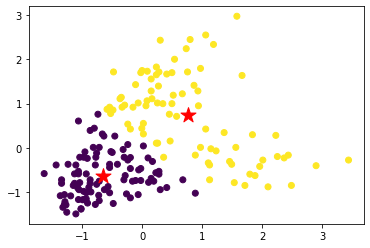

In [48]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=model.labels_)
#重心をつける
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=250, marker="*", c='red')
#s=250は重心のサイズ、marker="*"で重心を星マークに、c='red'で重心の色を赤色に
plt.show()

In [43]:
model.labels_
#K-meansの予測結果を返すことができる
#clusterを2にしているので、0と1の２クラスの結果が返ってきている

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [50]:
#同様にそれぞれの重心を求めたい時
model.cluster_centers_

#ただこれでは最適なクラスタ数に分けられているのかどうかはわからない

array([[-0.64703741, -0.63712275],
       [ 0.75750721,  0.74589981]])

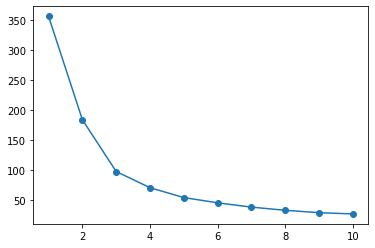

In [51]:
#エルボー法で最適なクラスタ数を求める
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, marker="o")
plt.show()


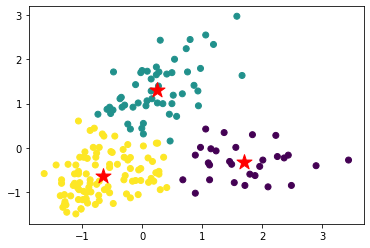

In [52]:
#ちょうど3つ目のところから緩やかになっているので3つが良さそう
#先程のコードのclusterを3にして処理を行う
model2 = KMeans(n_clusters=3, random_state=1)
model2.fit(X_std)

plt.scatter(X_std[:, 0], X_std[:, 1], c=model2.labels_)
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=250, marker="*", c='red')
plt.show()
#３つに別れた！！